# **Библиотеки**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Enable experimental features
from sklearn.experimental import enable_iterative_imputer  # Это нужно до импорта IterativeImputer

# Preprocessing
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# Column transformation
from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split, GridSearchCV

# Models
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Metrics
from sklearn.metrics import mean_absolute_percentage_error, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, make_scorer

# Encoding (additional)
import category_encoders as ce

import warnings
warnings.filterwarnings('ignore')

# **Загрузка данных**

In [2]:
path_train = 'train.csv'  
df = pd.read_csv(path_train)
df.shape

(380, 7)

# **Исследование данных**

### Как выглядит наши данные?

In [3]:
display(df.head())

,BCS,Age,Sex,Length,Girth,Height,Weight
0,3.0,5-10,stallion,99,114,100,152
1,3.0,5-10,female,91,123,97,173
2,3.0,10-15,gelding,99,123,106,171
3,2.5,2-5,female,92,105,96,121
4,3.0,<2,female,86,105,92,100


### Какие типы данных есть в наших данных?

In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BCS     380 non-null    float64
 1   Age     380 non-null    object 
 2   Sex     380 non-null    object 
 3   Length  380 non-null    int64  
 4   Girth   380 non-null    int64  
 5   Height  380 non-null    int64  
 6   Weight  380 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 20.9+ KB


None

### Описательная статистика

In [5]:
display(df.describe())

,BCS,Length,Girth,Height,Weight
count,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.901316,95.636842,116.026316,101.473684,153.021053
std,0.431446,7.499496,7.737060,4.460538,27.465682
min,1.000000,46.000000,66.000000,71.000000,27.000000
25%,2.500000,92.000000,113.000000,99.000000,139.750000
50%,3.000000,97.000000,117.000000,102.000000,157.000000
75%,3.000000,100.000000,121.000000,104.000000,172.000000
max,4.500000,112.000000,134.000000,113.000000,227.000000


### Проверка на дублирование значений

In [6]:
display(df.nunique())

BCS         8
Age         6
Sex         3
Length     40
Girth      42
Height     27
Weight    108
dtype: int64

### Проверка на пропуски

In [7]:
display(df.isnull().sum())

BCS       0
Age       0
Sex       0
Length    0
Girth     0
Height    0
Weight    0
dtype: int64

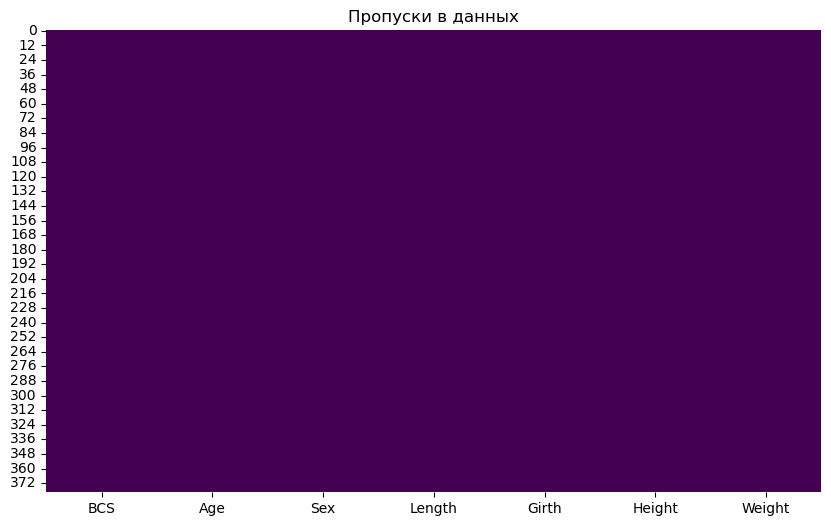

Series([], dtype: float64)


In [8]:
# Визуализация пропусков с помощью тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Пропуски в данных")
plt.show()

# Процент пропусков по каждому столбцу
missing_data = df.isnull().sum() / len(df) * 100
print(missing_data[missing_data > 0].sort_values(ascending=False))

### Проверка на дубликаты

In [9]:
display(df[df.duplicated()])

,BCS,Age,Sex,Length,Girth,Height,Weight


### Общее количество дублирующихся строк во всем DataFrame

In [10]:
total_duplicates = df.duplicated().sum()
print(f"Общее количество дублирующихся строк во всем DataFrame: {total_duplicates}")

Общее количество дублирующихся строк во всем DataFrame: 0


# **Одномерный анализ данных**

### Прикиним распределение данных в столбцах 

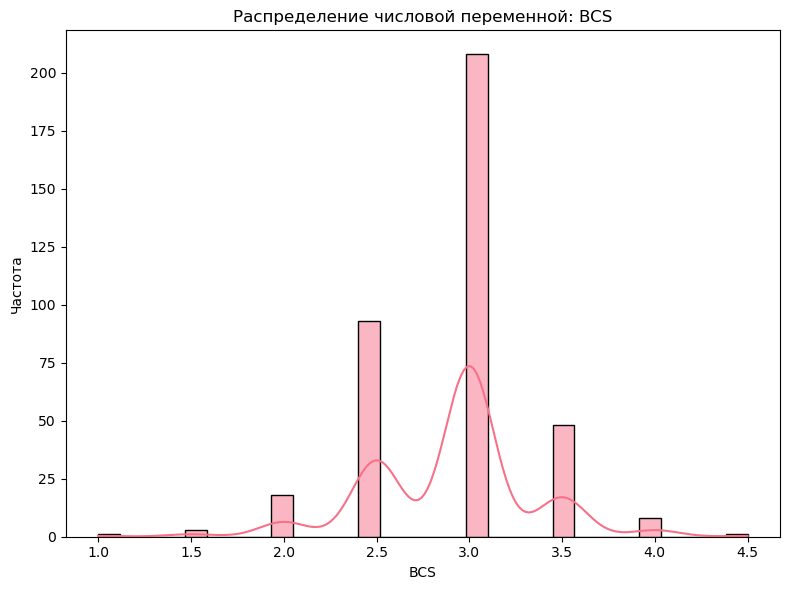

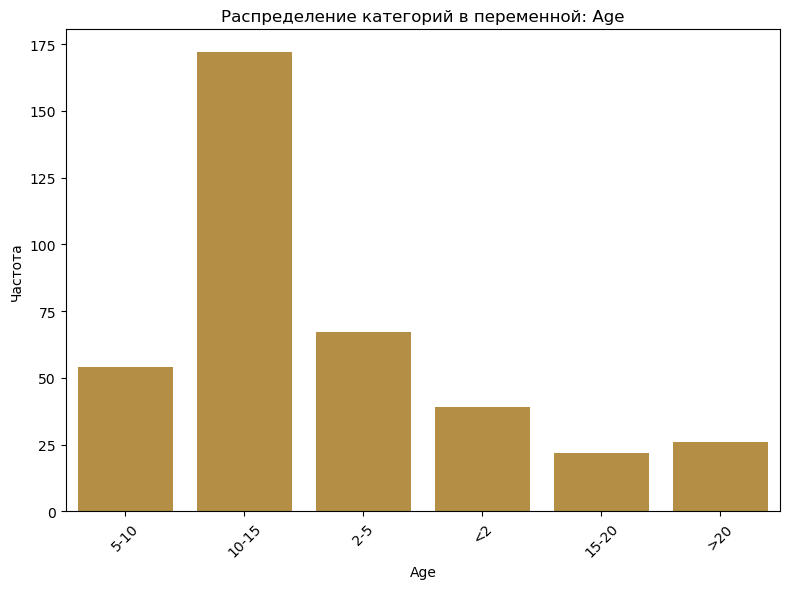

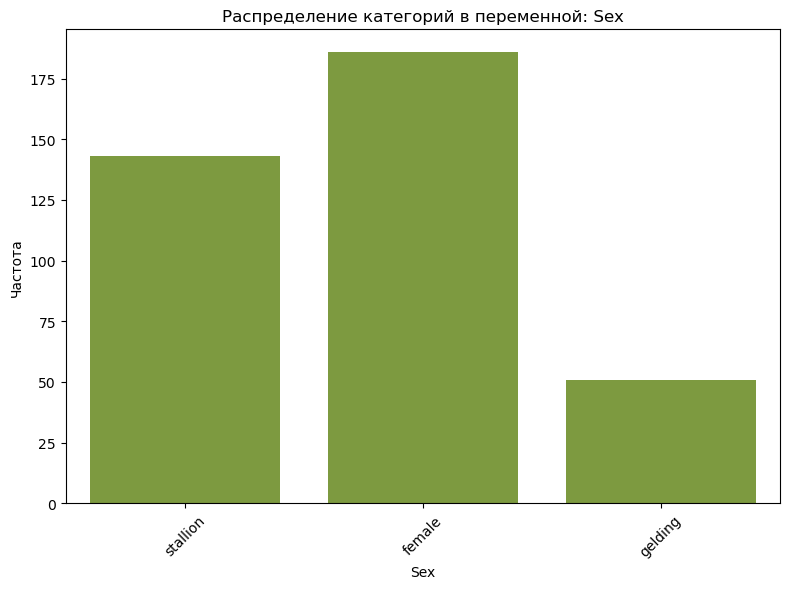

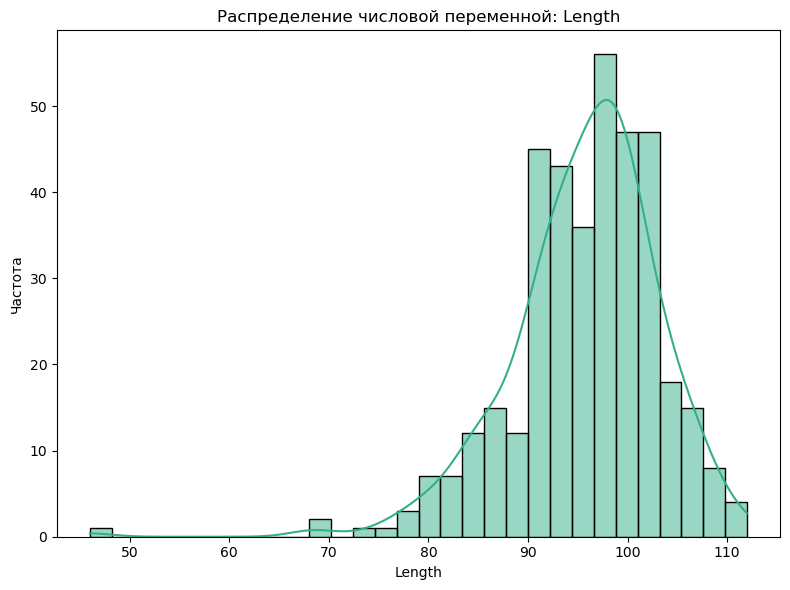

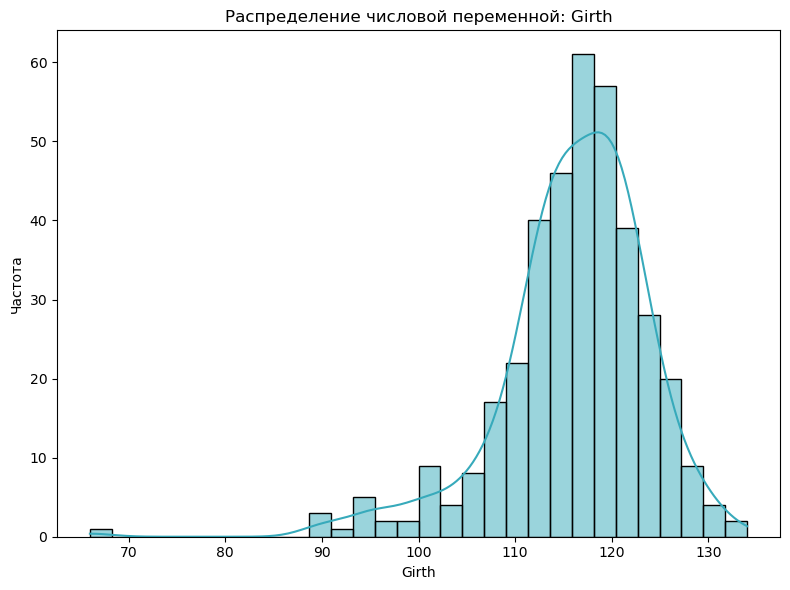

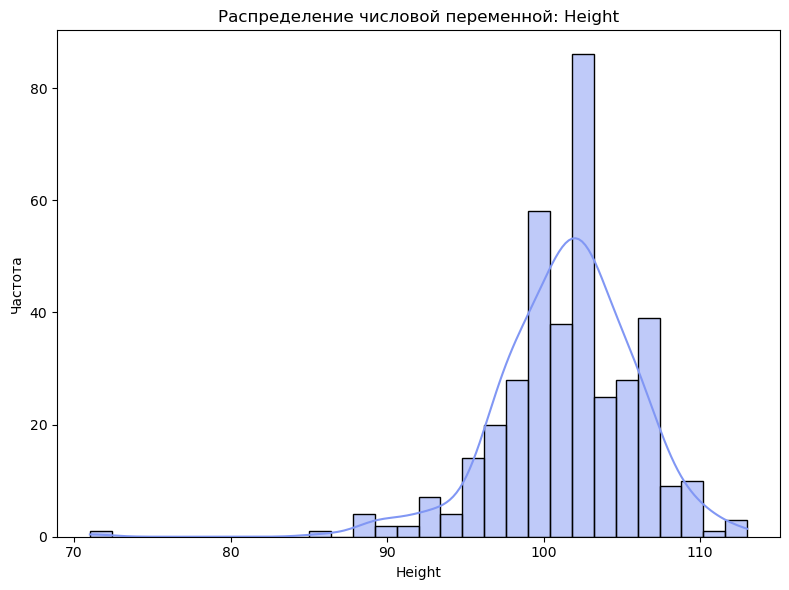

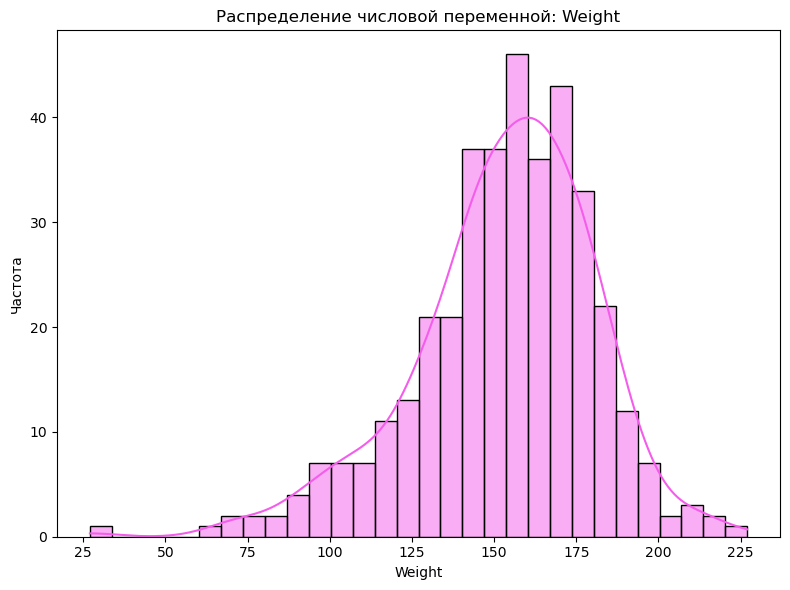

In [11]:
palette = sns.color_palette("husl", len(df.columns))
for i, column in enumerate(df.columns):
    plt.figure(figsize=(8, 6))
    
    # Проверяем тип данных столбца
    if df[column].dtype in ['int64', 'float64']:  # Числовые переменные
        sns.histplot(df[column], kde=True, color=palette[i], bins=30)
        plt.title(f'Распределение числовой переменной: {column}')
    elif df[column].dtype == 'object':  # Категориальные переменные
        sns.countplot(data=df, x=column, palette=[palette[i]])
        plt.title(f'Распределение категорий в переменной: {column}')
        plt.xticks(rotation=45)
    else:
        plt.title(f'Переменная {column} имеет неподдерживаемый тип: {df[column].dtype}')
    
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.tight_layout()
    plt.show()

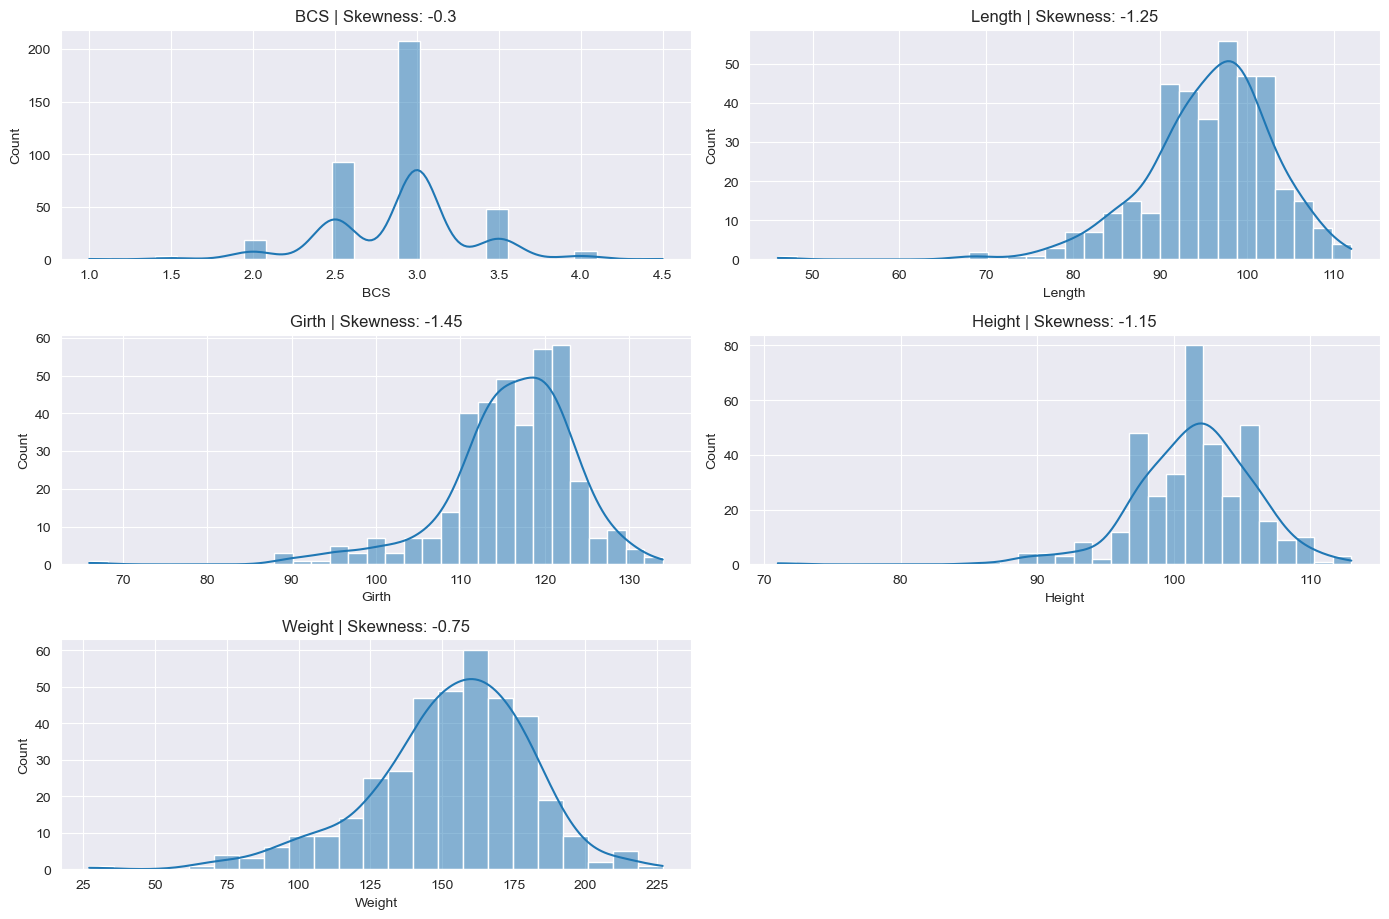

In [12]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

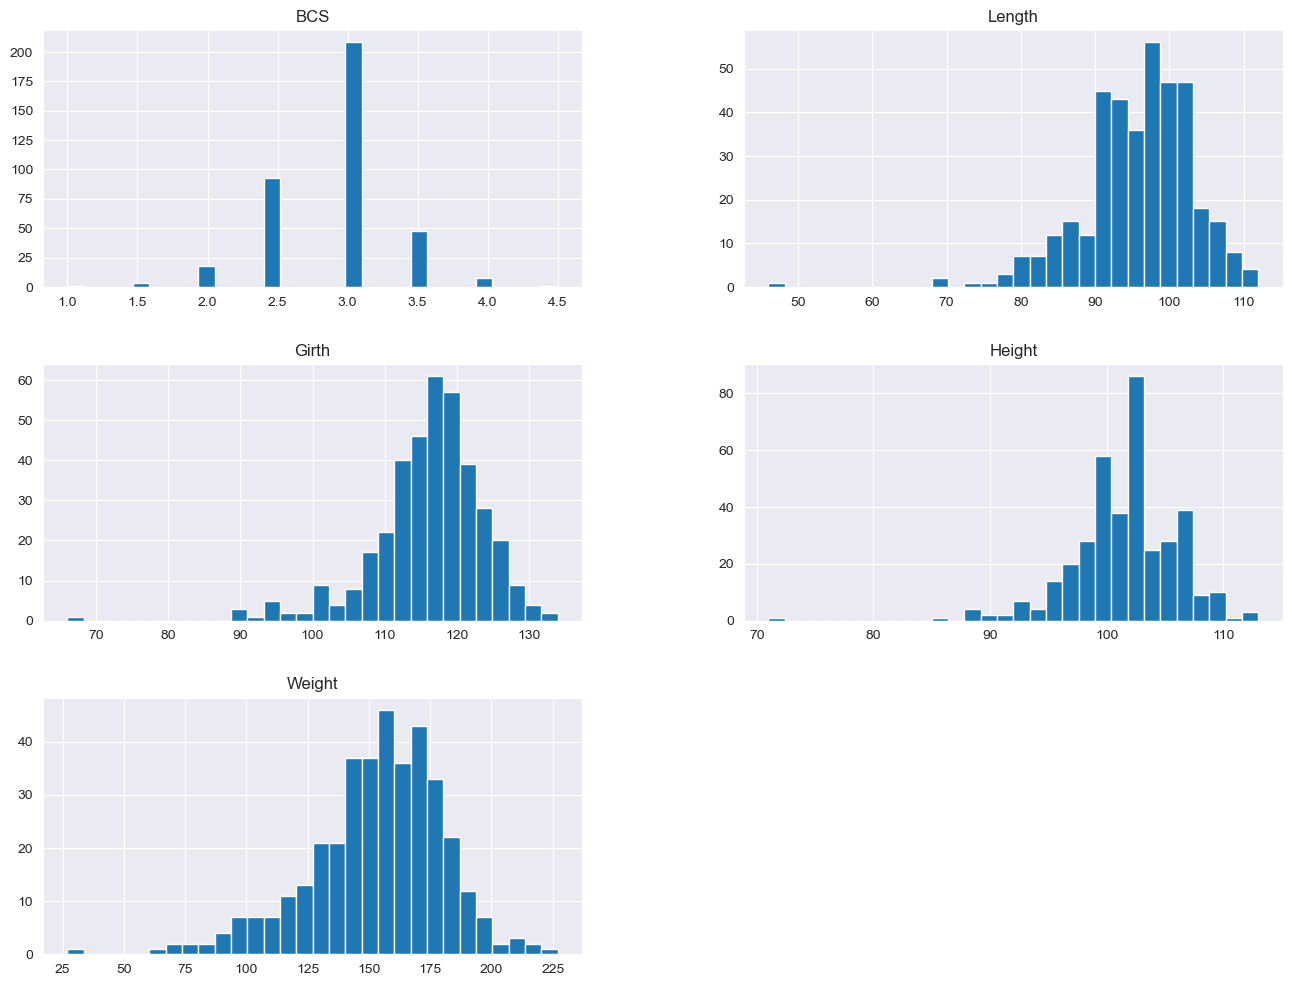

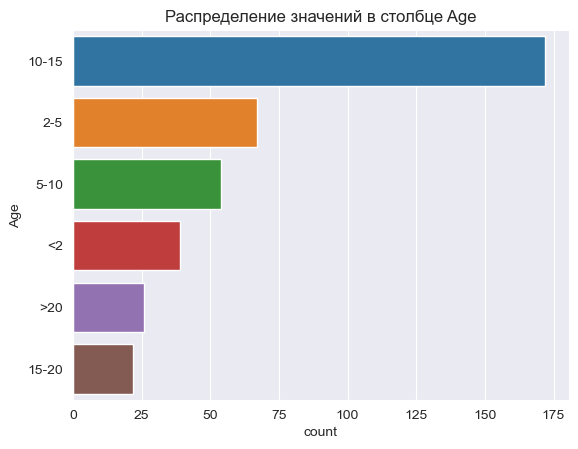

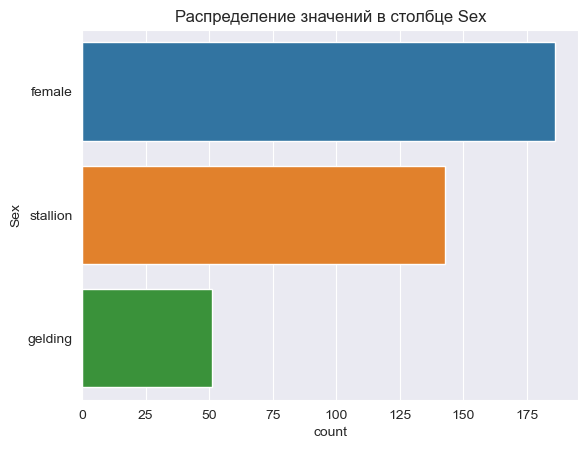

In [13]:
# Гистограммы для всех числовых столбцов
df.hist(figsize=(16, 12), bins=30)
plt.show()

# Анализ категориальных признаков
for col in df.select_dtypes(include=['object']).columns:
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Распределение значений в столбце {col}')
    plt.show()

# **Анализ выбросов**

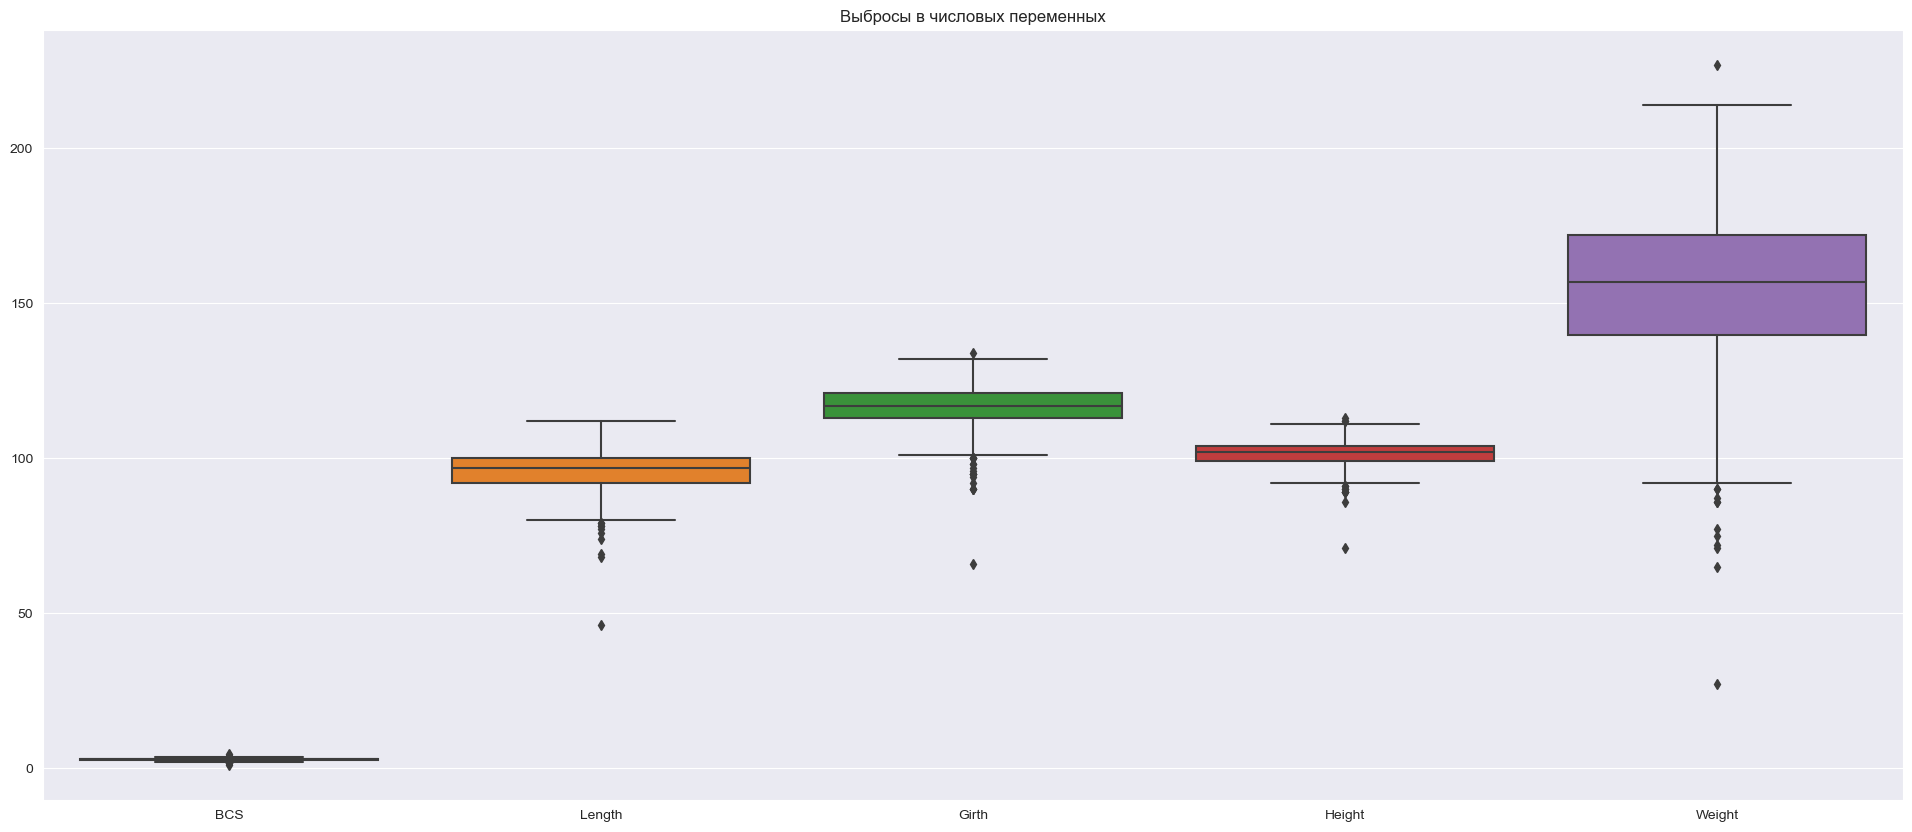

In [14]:
plt.figure(figsize=(24, 10))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title("Выбросы в числовых переменных")
plt.show()

----------------------------------------
Столбец 'BCS':
 - Q1: 2.5, Q3: 3.0, IQR: 0.5
 - Границы выбросов: ниже 1.75 или выше 3.75
 - Количество выбросов: 13


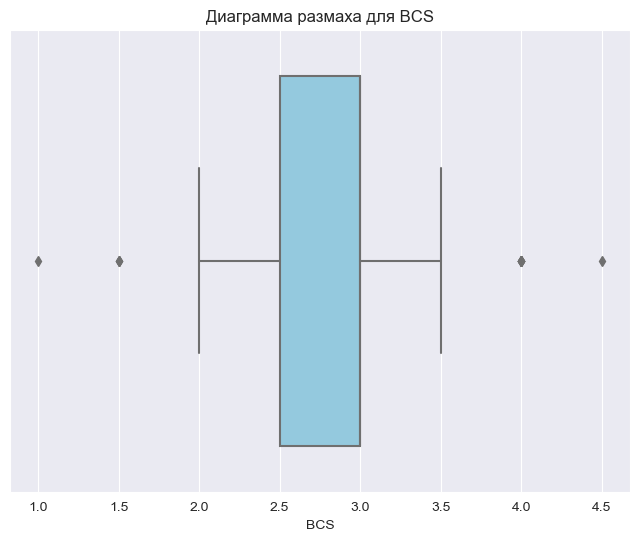

Примеры выбросов в столбце 'BCS':
    BCS
12  4.0
13  4.0
30  4.0
83  4.5
94  1.5
----------------------------------------
Столбец 'Length':
 - Q1: 92.0, Q3: 100.0, IQR: 8.0
 - Границы выбросов: ниже 80.0 или выше 112.0
 - Количество выбросов: 10


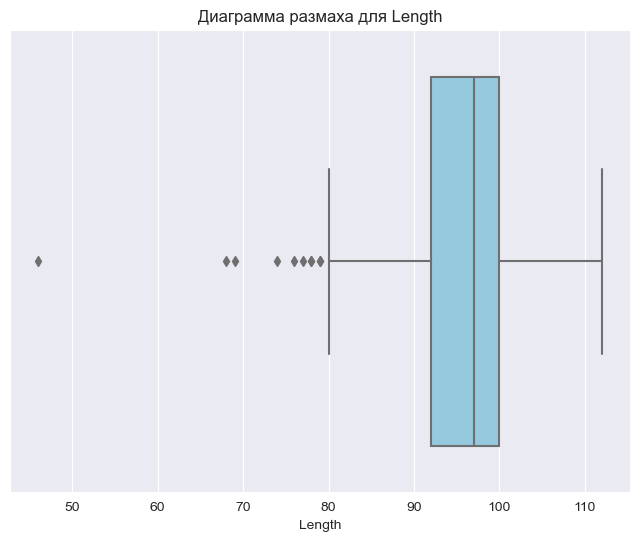

Примеры выбросов в столбце 'Length':
     Length
26       74
93       69
142      46
248      79
250      78
----------------------------------------
Столбец 'Girth':
 - Q1: 113.0, Q3: 121.0, IQR: 8.0
 - Границы выбросов: ниже 101.0 или выше 133.0
 - Количество выбросов: 19


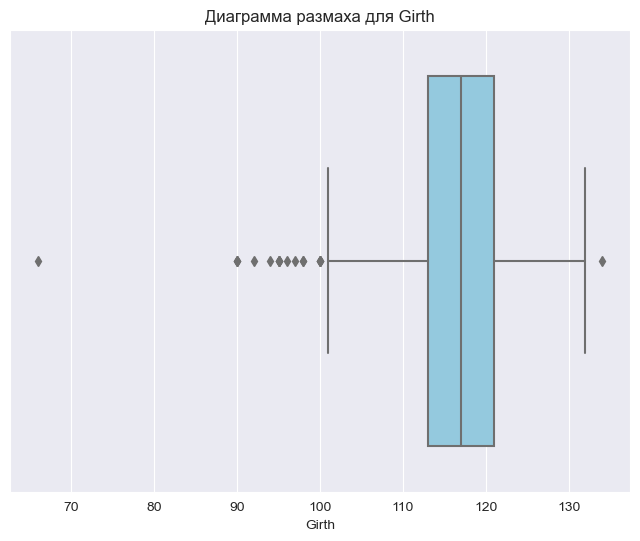

Примеры выбросов в столбце 'Girth':
    Girth
26     90
44     95
59     97
74    100
93     90
----------------------------------------
Столбец 'Height':
 - Q1: 99.0, Q3: 104.0, IQR: 5.0
 - Границы выбросов: ниже 91.5 или выше 111.5
 - Количество выбросов: 13


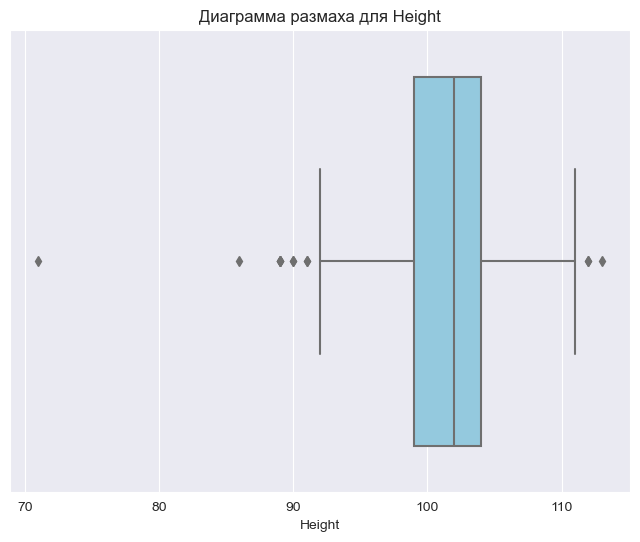

Примеры выбросов в столбце 'Height':
     Height
26       89
67      112
93       91
110      89
124      91
----------------------------------------
Столбец 'Weight':
 - Q1: 139.75, Q3: 172.0, IQR: 32.25
 - Границы выбросов: ниже 91.375 или выше 220.375
 - Количество выбросов: 12


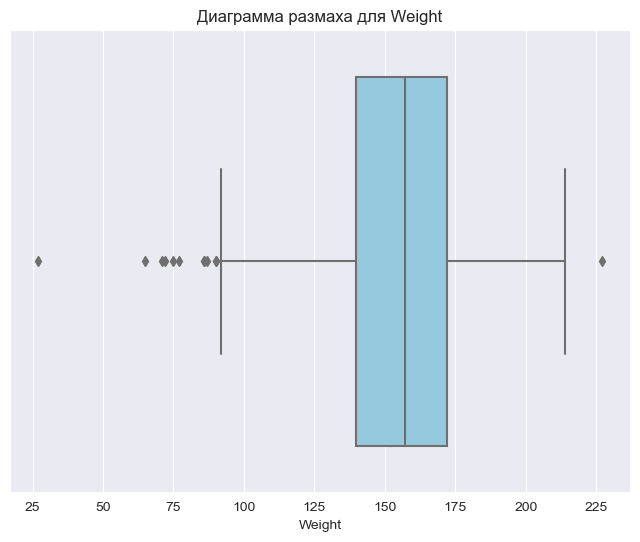

Примеры выбросов в столбце 'Weight':
     Weight
26       71
44       90
83      227
93       65
135      90
----------------------------------------
Общее количество выбросов во всех числовых столбцах: 67


In [15]:
def analyze_outliers(data, column):
    Q1 = data[column].quantile(0.25)  # Первый квартиль
    Q3 = data[column].quantile(0.75)  # Третий квартиль
    IQR = Q3 - Q1  # Межквартильный размах
    
    # Границы выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Определение выбросов
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outlier_count = outliers.shape[0]
    
    print(f"Столбец '{column}':")
    print(f" - Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f" - Границы выбросов: ниже {lower_bound} или выше {upper_bound}")
    print(f" - Количество выбросов: {outlier_count}")
    
    return outliers

# Анализ выбросов для числовых переменных
numeric_columns = df.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    print("-" * 40)
    outliers = analyze_outliers(df, column)

    # Визуализация выбросов
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f'Диаграмма размаха для {column}')
    plt.show()

    if not outliers.empty:
        print(f"Примеры выбросов в столбце '{column}':")
        print(outliers[[column]].head())

# Дополнительно: Подсчет общего числа выбросов в наборе данных
total_outliers = 0
for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    total_outliers += ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()

print("-" * 40)
print(f"Общее количество выбросов во всех числовых столбцах: {total_outliers}")

# **Корреляционный анализ**

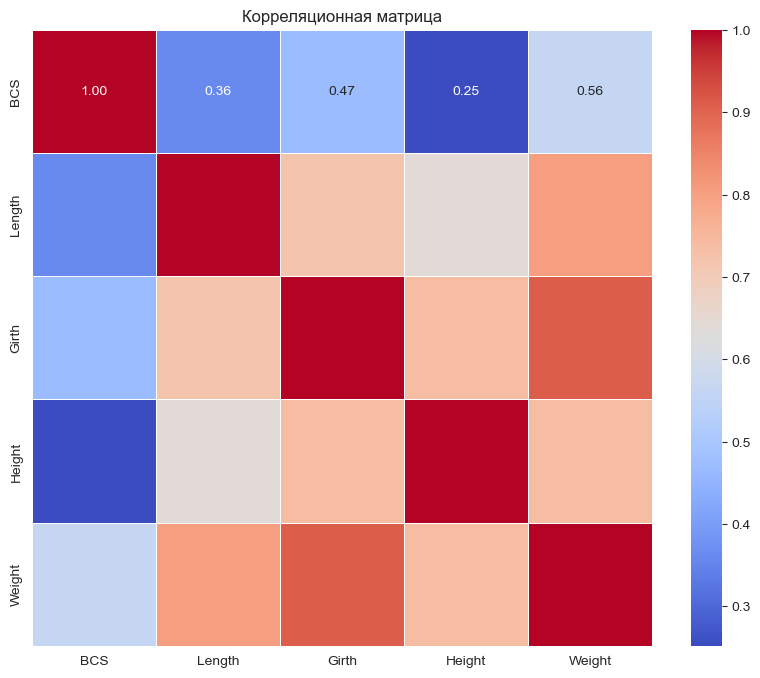

In [16]:
numeric_columns = df.select_dtypes(include=['number'])

# Построение корреляционной матрицы
correlation_matrix = numeric_columns.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

# **pairplot**

In [17]:
# # Set the color palette
# sns.set_palette("Pastel1")

# # Assuming 'df' is your DataFrame
# plt.figure(figsize=(10, 6))

# # Using Seaborn to create a pair plot with the specified color palette
# sns.pairplot(df)

# plt.suptitle('Pair Plot for DataFrame')
# plt.show()

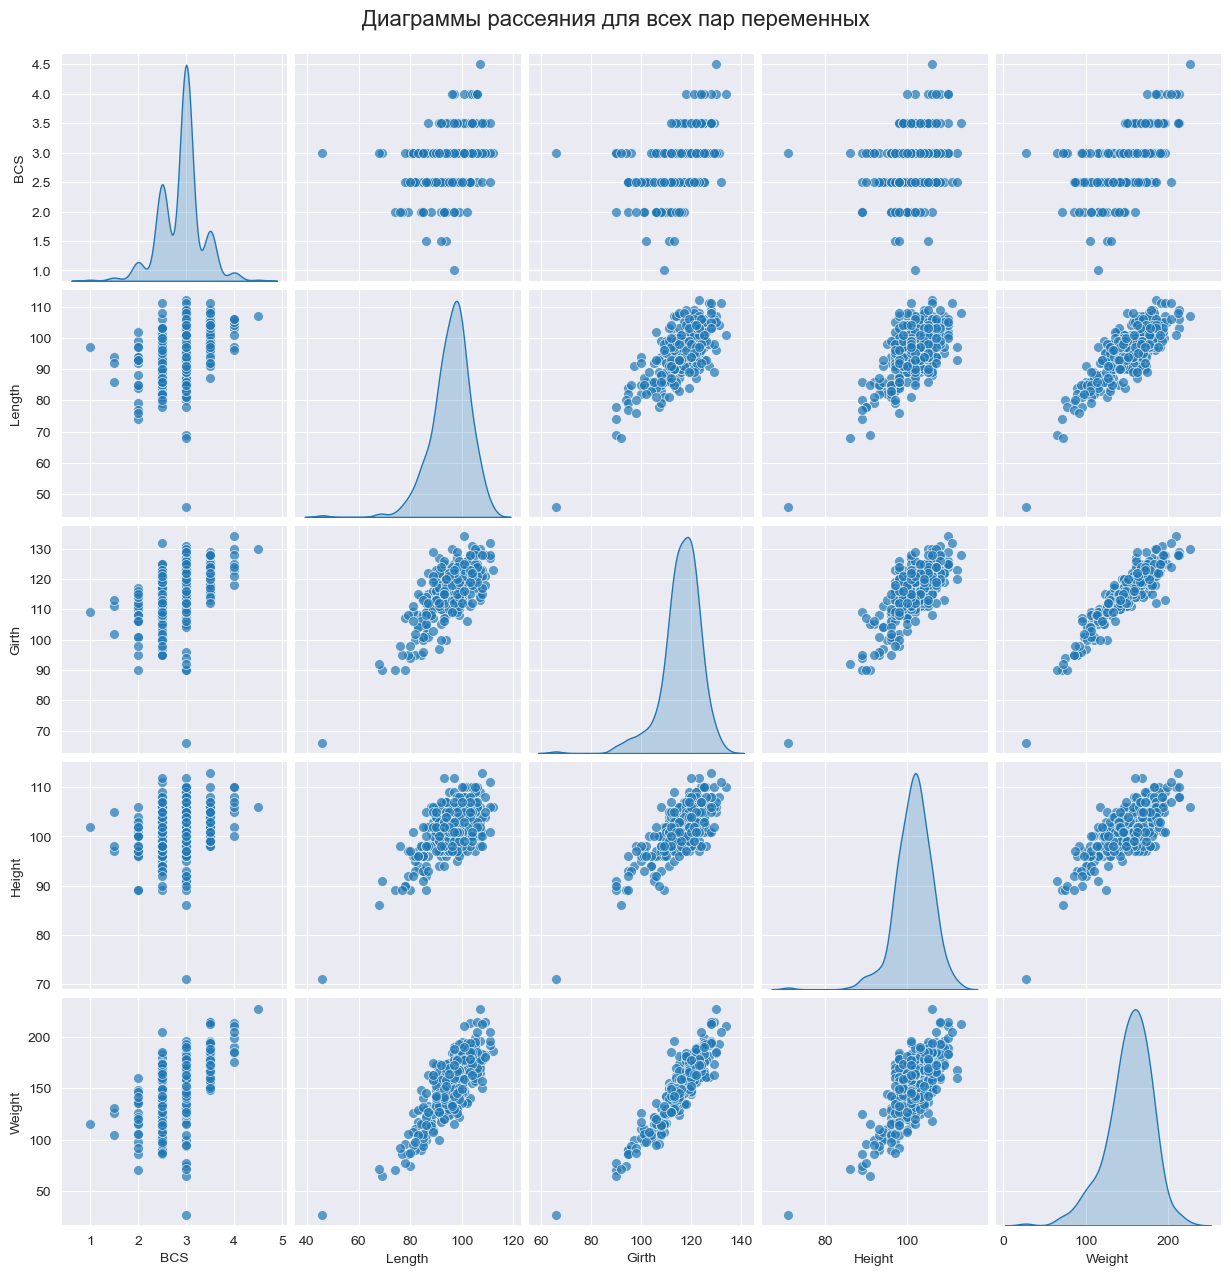

In [18]:
numeric_columns = df.select_dtypes(include=['number'])

# Построение Pairplot
sns.pairplot(numeric_columns, diag_kind='kde', kind='scatter', plot_kws={'alpha': 0.7, 's': 50})
plt.suptitle('Диаграммы рассеяния для всех пар переменных', y=1.02, fontsize=16)
plt.show()

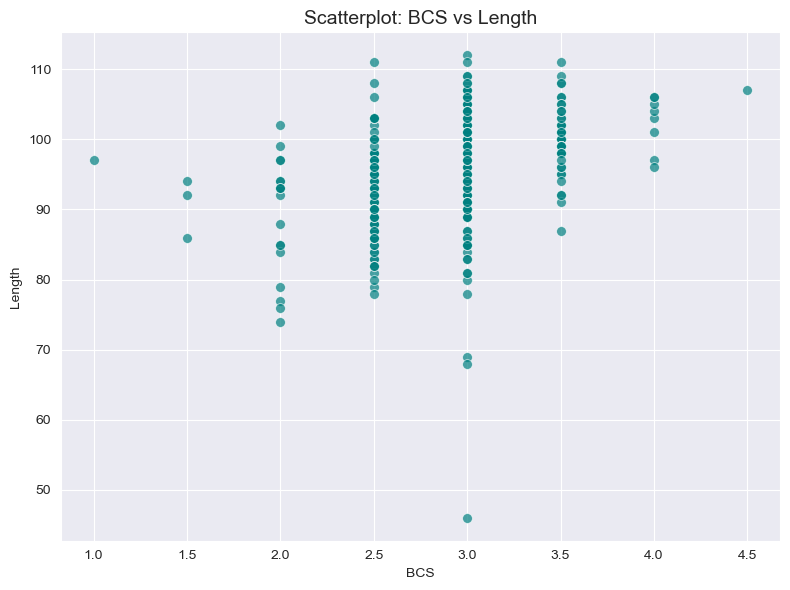

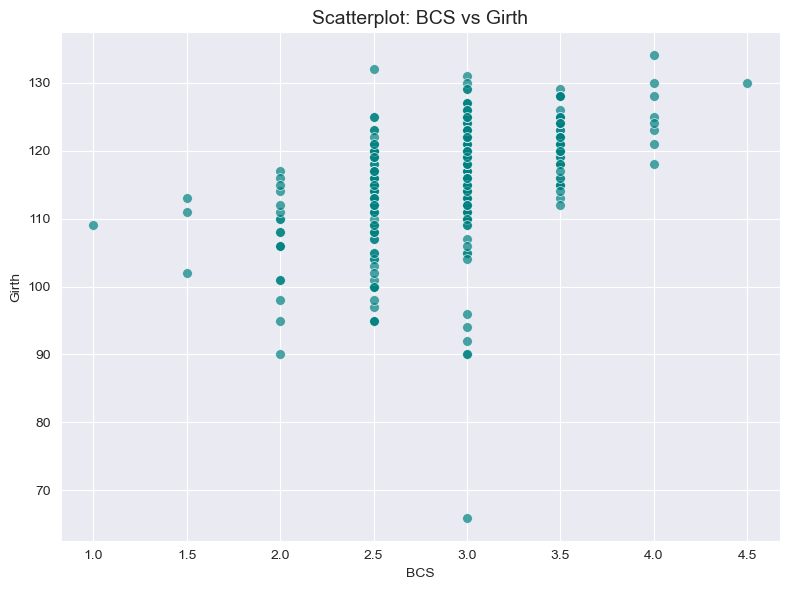

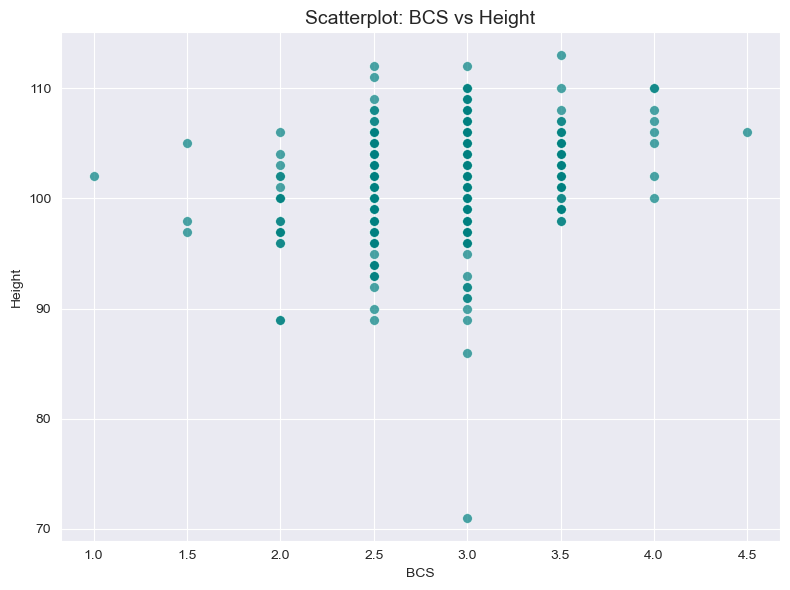

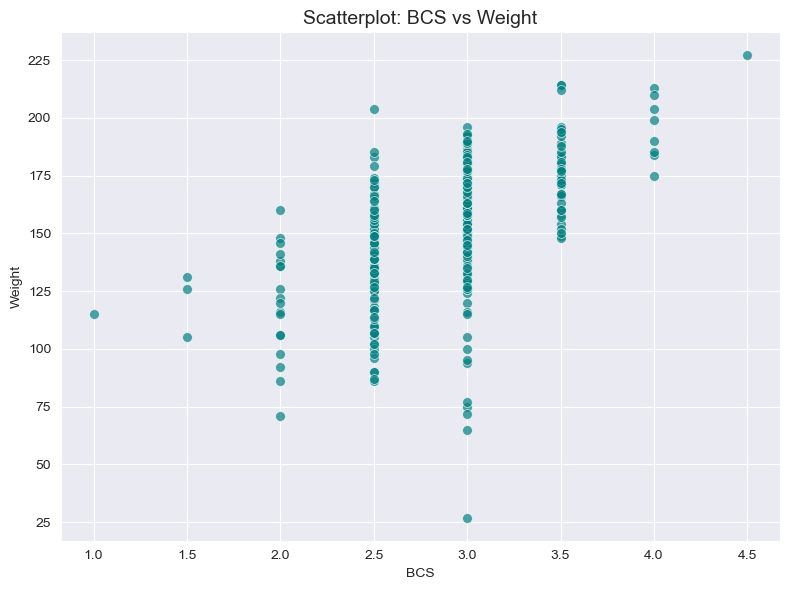

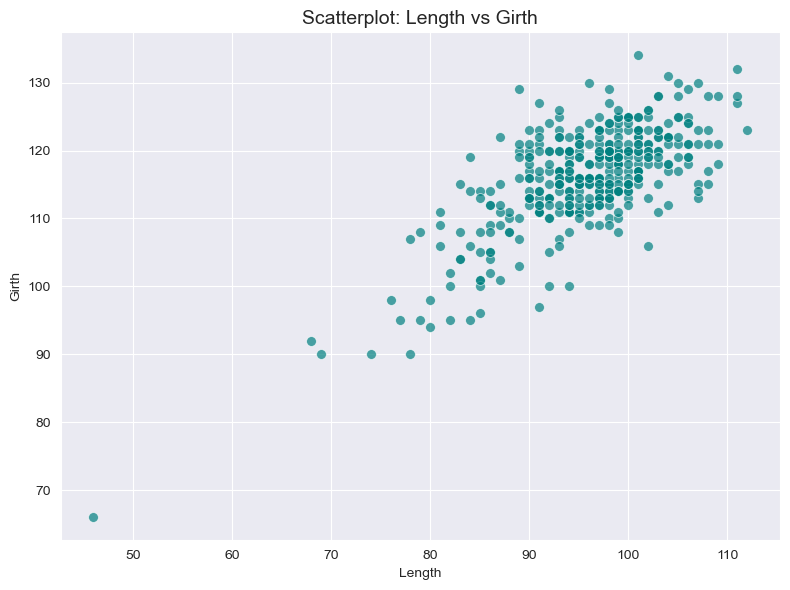

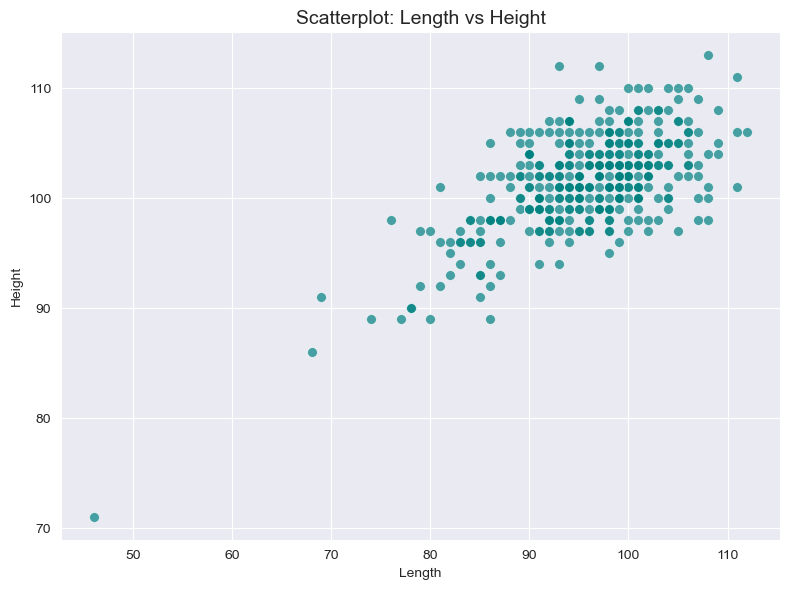

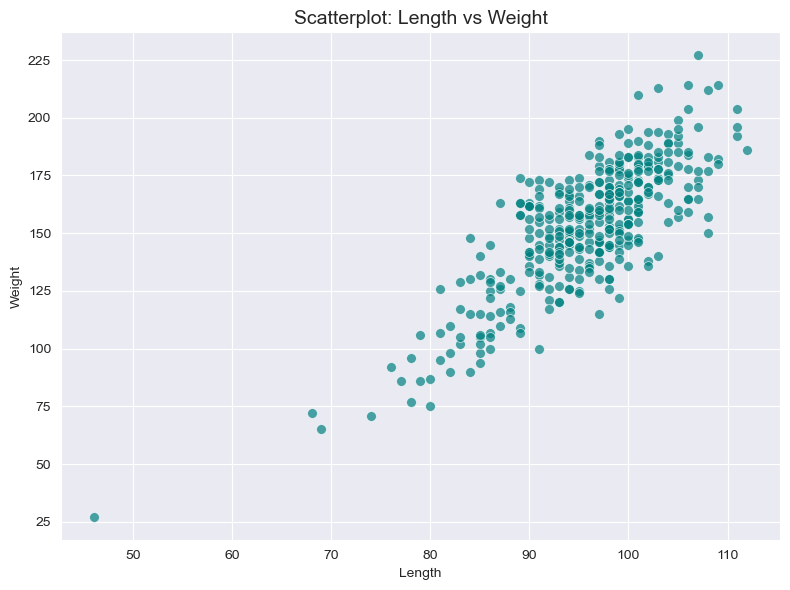

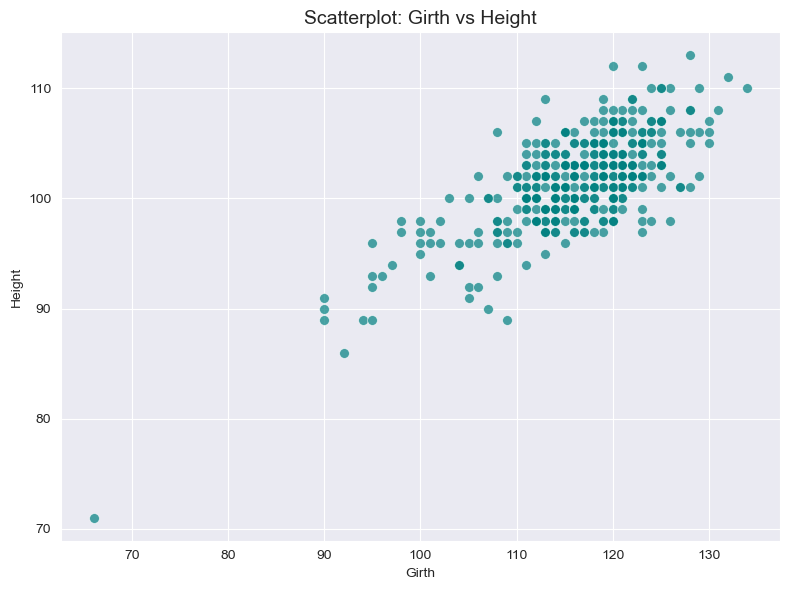

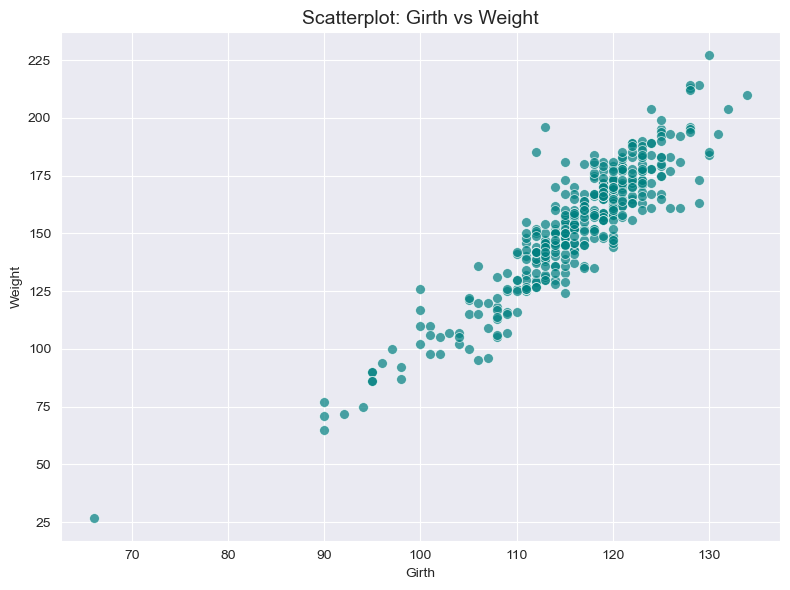

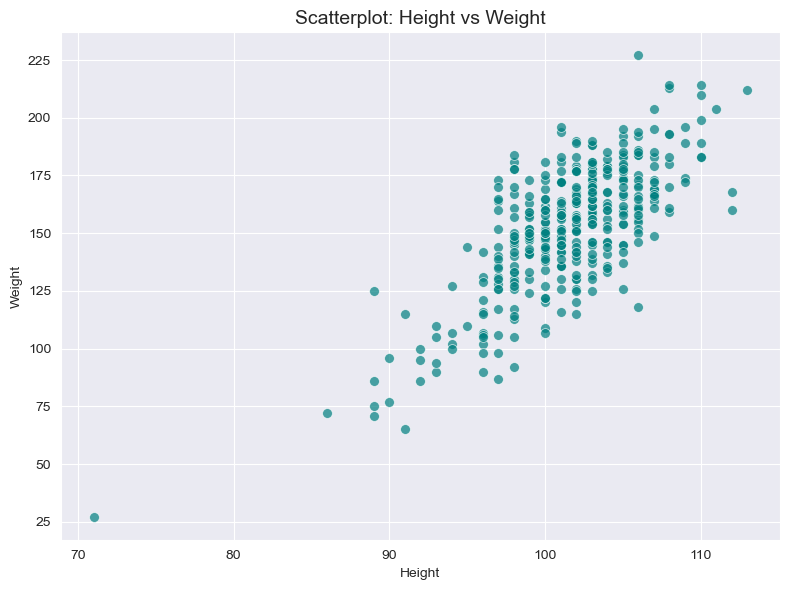

In [19]:
import itertools
import numpy as np

# Получение всех пар числовых столбцов
columns = numeric_columns.columns
pairs = list(itertools.combinations(columns, 2))

# Построение графиков
for x, y in pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=x, y=y, alpha=0.7, color='teal', s=50)
    plt.title(f'Scatterplot: {x} vs {y}', fontsize=14)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# **Анализ категориальных переменных**

=== Анализ столбца 'Age' ===
Уникальные значения: 6
Наиболее частые категории:
Age
10-15    172
2-5       67
5-10      54
<2        39
>20       26
Name: count, dtype: int64


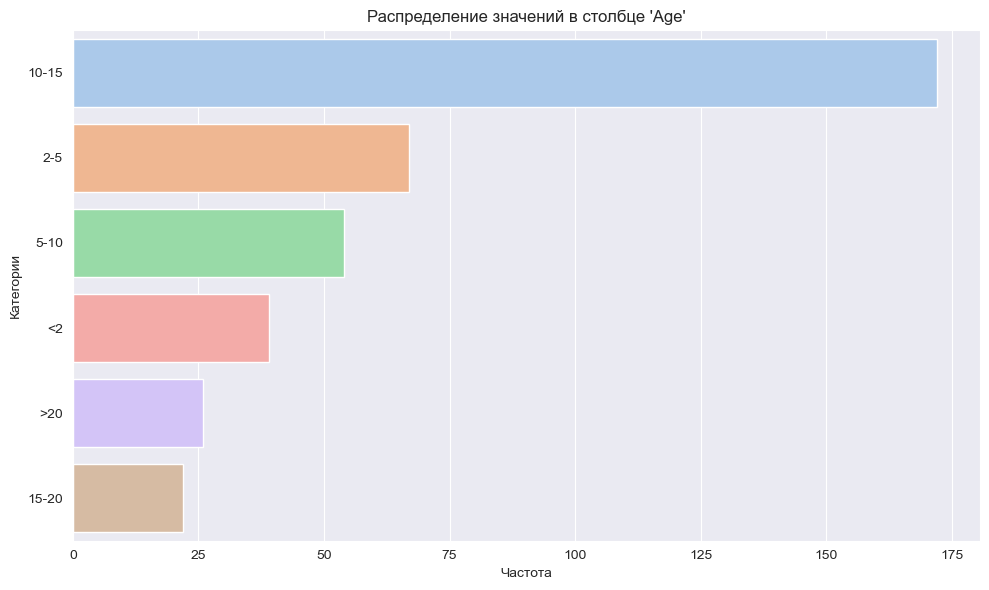

=== Анализ столбца 'Sex' ===
Уникальные значения: 3
Наиболее частые категории:
Sex
female      186
stallion    143
gelding      51
Name: count, dtype: int64


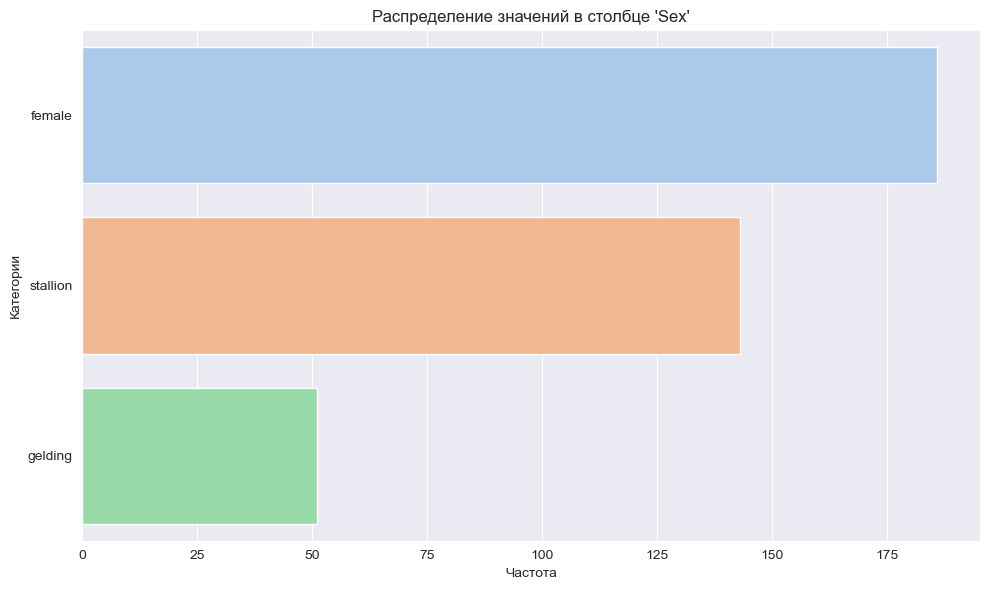

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_categorical_columns(df):
    """
    Выполняет анализ категориальных переменных в наборе данных.
    
    :param df: DataFrame с данными.
    """
    # Выбор категориальных переменных
    cat_columns = df.select_dtypes(include=['object', 'category']).columns
    if not cat_columns.any():
        print("Категориальных переменных не найдено!")
        return
    
    for col in cat_columns:
        print(f"=== Анализ столбца '{col}' ===")
        print(f"Уникальные значения: {df[col].nunique()}")
        print(f"Наиболее частые категории:\n{df[col].value_counts().head()}")
        
        # Построение графиков распределения
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="pastel")
        plt.title(f"Распределение значений в столбце '{col}'")
        plt.xlabel("Частота")
        plt.ylabel("Категории")
        plt.tight_layout()
        plt.show()

def visualize_relationship_cat_num(df, cat_column, num_column):
    """
    Визуализирует связь между категориальной и числовой переменными.
    
    :param df: DataFrame с данными.
    :param cat_column: Название категориального столбца.
    :param num_column: Название числового столбца.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=cat_column, y=num_column, palette="Set3")
    plt.title(f"Связь между '{cat_column}' и '{num_column}'")
    plt.xlabel(cat_column)
    plt.ylabel(num_column)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

analyze_categorical_columns(df)
    
# Визуализация связи категориальной и числовой переменной
# visualize_relationship_cat_num(df, cat_column='Category', num_column='Value')

# **Поиск важности фич** 

### пример удаления признаков с низкой дисперией 

In [21]:
cancer = load_breast_cancer()
rng = np.random.RandomState(42)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0, test_size=.3)

#ths = 0
ths = (.9 * (1 - .9))
cancer_var = VarianceThreshold(threshold = ths)
cancer_var.fit_transform(X_train)
mask = cancer_var.get_support()


plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.xlabel("Индекс признака")
cancer_var.get_support()

NameError: name 'load_breast_cancer' is not defined

### Сравнение F-теста и взаимной информативности

In [ ]:
from sklearn.feature_selection import f_regression, mutual_info_regression

np.random.seed(42)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(6 * np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

f_test, _ = f_regression(X, y)
f_test /= np.max(f_test) # нормировать (разделить) на максимальное значение

mi = mutual_info_regression(X, y)
mi /= np.max(mi) # нормировать (разделить) на максимальное значение

plt.figure(figsize=(20, 3))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y, edgecolor="black", s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=10)
    if i == 0:
        plt.ylabel("$y$", fontsize=10)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]), fontsize=11)
plt.show()

# Общая стратегия для отбора признаков с использованием одномерных статистических тестов

Общая стратегия. 
- Добавим шум к признакам. 
- Если исходные признаки статистически слабее шума, алгоритм их отбросит. 

**Внимание работа ведется только для EDA-анализа, чтобы понять насколько важны признаки!**

Отберем признаки с использованием перцентильного анализа и выставления на его основе знацимости признака

In [ ]:
from sklearn.feature_selection import SelectPercentile

cancer = load_breast_cancer()

# задаем определенное стартовое значение для воспроизводимости результата
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# добавляем к данным шумовые признаки
# первые 30 признаков являются исходными, остальные 50 являются шумовыми
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)
# используем f_classif (по умолчанию)
# и SelectPercentile, чтобы выбрать 50% признаков
select_pct = SelectPercentile(percentile=50)
select_pct.fit(X_train, y_train)
# преобразовываем обучающий набор
X_train_selected = select_pct.transform(X_train)

print("форма массива X_train: {}".format(X_train.shape))
print("форма массива X_train_selected: {}".format(X_train_selected.shape))

In [ ]:
mask = select_pct.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.xlabel("Индекс признака");

mask = select_pct.get_support()[:30]
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.2)
plt.yticks([])
plt.xlabel("Индекс признака");

### Построение простой важности признаков

In [22]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0, test_size=.3)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train,y_train)

plt.figure(figsize=(15,8))
feature_names = np.array(cancer.feature_names)
#importance = rfc.feature_importances_

importance = np.sort(rfc.feature_importances_)
importance_name = np.argsort(rfc.feature_importances_)

plt.barh(width=importance, y = feature_names[importance_name] )
ax = plt.gca()
ax.invert_yaxis()
plt.title("Важность признаков")
plt.show()

NameError: name 'cancer' is not defined

In [23]:
importance = rfc.feature_importances_

plt.figure(figsize=(15,8))
plt.barh(width=importance, y=feature_names)
plt.gca().invert_yaxis()
plt.title("Важность признаков")
plt.show()

mask = importance
plt.matshow( mask.reshape(1,-1), cmap = 'Blues', aspect=0.3)
plt.yticks([])
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");

NameError: name 'rfc' is not defined

### Рекурсивный отбор признаков на основе алгоритмов

In [24]:
from sklearn.feature_selection  import RFE
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

rfe_select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

rfe_select.fit(X_train, y_train)


# визуализируем отобранные признаки:
mask = rfe_select.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");

mask = rfe_select.get_support()[:30]
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.2)
plt.yticks([])
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");

NameError: name 'X_w_noise' is not defined

### Отбор признаков на основе модели

In [25]:
from sklearn.feature_selection import SelectFromModel
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42, test_size=.5)

##############################################################
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")
##############################################################
select.fit(X_train, y_train)
X_train_med = select.transform(X_train)
print("форма обуч набора X: {}".format(X_train.shape))
print("форма обуч набора X median: {}".format(X_train_med.shape))
mask = select.get_support()
# визуализируем булевы значения -- черный – True, белый – False
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.3)
plt.yticks([])
plt.xlabel("Индекс признака");
plt.show();

print("----------------------------------------------------")
##############################################################
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="0.2*mean")         # внимание на синтаксис
##############################################################
select.fit(X_train, y_train)
X_train_mean = select.transform(X_train)
print("форма обуч набора X: {}".format(X_train.shape))
print("форма обуч набора X 0.2*mean: {}".format(X_train_mean.shape))
mask = select.get_support()
# визуализируем булевы значения -- черный – True, белый – False
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.3)
plt.yticks([])
plt.xlabel("Индекс признака");
plt.show();

print("----------------------------------------------------")
##############################################################
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold = -np.inf,     # внимание на синтаксис
    max_features = 
    20 )         # внимание на синтаксис
##############################################################
select.fit(X_train, y_train)
X_train_mean = select.transform(X_train)
print("форма обуч набора X: {}".format(X_train.shape))
print("форма обуч набора X -np.inf: {}".format(X_train_mean.shape))
mask = select.get_support()
# визуализируем булевы значения -- черный – True, белый – False
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.3)
plt.yticks([])
plt.xlabel("Индекс признака");
plt.show();

NameError: name 'cancer' is not defined

### Последовательный отбор признаков SequentialFeatureSelector (SFS)

In [26]:
from datetime import datetime
start_time = datetime.now()
from sklearn.feature_selection import SequentialFeatureSelector
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0, test_size=.5)

select_f = SequentialFeatureSelector(
             RandomForestClassifier(n_estimators=100, random_state=42, n_jobs = -1),
             n_features_to_select=15, 
             direction="forward",
             n_jobs=-1)

select_f.fit(X_train, y_train)
# визуализируем отобранные признаки:
mask = select_f.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.3)
plt.yticks([])
plt.xlabel("Индекс признака");
plt.show();
end_time = datetime.now()

NameError: name 'cancer' is not defined

In [ ]:
print('Duration: {}'.format(end_time - start_time))

In [ ]:
start_time_2 = datetime.now()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0, test_size=.5)

select_b = SequentialFeatureSelector(
             RandomForestClassifier(n_estimators=100, random_state=42, n_jobs = -1),
             n_features_to_select=15, 
             direction="backward", 
             n_jobs=-1)

select_b.fit(X_train, y_train)
# визуализируем отобранные признаки:
mask = select_b.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.3)
plt.yticks([])
plt.xlabel("Индекс признака");
plt.show();
end_time_2 = datetime.now()

In [ ]:
print('Duration: {}'.format(end_time_2 - start_time_2))

In [ ]:
clf = RandomForestClassifier(n_estimators=5000, random_state=42, n_jobs = -1)
start_time_3 = datetime.now()
clf.fit(cancer.data, cancer.target)
end_time_3 = datetime.now()
print('Duration: {}'.format(end_time_3 - start_time_3))

In [ ]:
clf = RandomForestClassifier(n_estimators=5000, random_state=42)
start_time_3 = datetime.now()
clf.fit(cancer.data, cancer.target)
end_time_3 = datetime.now()
print('Duration: {}'.format(end_time_3 - start_time_3))